<a href="https://colab.research.google.com/github/HelloPenguin1/Pytorch_learning/blob/main/Pytorch_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

### Tensors
- A torch tensor is multi-dim matrix containing elements of a single data type
- Work better on GPUs
- default data type of float32
- more suitable for DL than a numpy array

In [2]:
tensor_2d = torch.randn(3)
tensor_2d

tensor([-1.1839, -0.2975, -2.2080])

In [3]:
tensor = torch.arange(10)
tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
tensor2 = tensor.reshape(2,5)
tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
tensor3 = torch.arange(15)
tensor3

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [6]:
tensor4 = tensor.reshape(-1, 2)

In [7]:
tensor4

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

Simple Neural Network

In [8]:
import torch.nn as nn #torch's neural network
import torch.nn.functional as F  #helps move data forward in a neural network

In [9]:
# create a model class that inherits nn.Module

In [10]:
class Model(nn.Module):
  #Input layer -> Hidden layer 1 (some num of neurons) -> Hl2 (some num of neurons) -> output layer
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() #instantiate our nn model


    self.fc1= nn.Linear(in_features, h1)     # fully connected layer 1 to linearly passes information from input to hidden layer 1
    self.fc2 = nn.Linear(h1, h2)             # to pass info for hidden 1 to hidden 2
    self.out = nn.Linear(h2, out_features)   # output layer to linearly pass info from h2 to output

  #function to move information
  def forward(self, x):
    x = F.relu(self.fc1(x))  #start with layer one
    x = F.relu(self.fc2(x))  #move to layer 2
    x = self.out(x)
    return x

In [11]:
torch.manual_seed(41)

In [12]:
#create an instance of the model
model = Model()

Load data

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [15]:
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [16]:
# Change output names to int
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)

/tmp/ipython-input-559000626.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2.0)


In [17]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [18]:
# Train Test split
X = df.drop('variety', axis = 1).values
y = df['variety'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

Convert to tensors

In [20]:
#convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [21]:
#covert Y features to long tensors
y_train= torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Using CrossEntropyLoss and Adam Optimizer

In [22]:
#set the criterion of the model to measure the error, how far the predictions are from the output
loss_type = nn.CrossEntropyLoss()

#choose optimizer : ADAM, and learning rate (if error doesnt reduce after some iterations, lower it)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

Train model with 100 epochs


In [23]:
epochs =200
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = loss_type(y_pred, y_train)

  losses.append(loss.detach().numpy())


  #print every 10 epochs
  if i%10==0:
    print(f"Epoch: {i} and Loss: {loss}")

  #backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 1.125203251838684
Epoch: 10 and Loss: 1.0097211599349976
Epoch: 20 and Loss: 0.8162347674369812
Epoch: 30 and Loss: 0.585993230342865
Epoch: 40 and Loss: 0.4003389775753021
Epoch: 50 and Loss: 0.26794716715812683
Epoch: 60 and Loss: 0.1796349585056305
Epoch: 70 and Loss: 0.12165623158216476
Epoch: 80 and Loss: 0.0860651507973671
Epoch: 90 and Loss: 0.06522614508867264
Epoch: 100 and Loss: 0.05286872014403343
Epoch: 110 and Loss: 0.04508011043071747
Epoch: 120 and Loss: 0.03979310765862465
Epoch: 130 and Loss: 0.03596426919102669
Epoch: 140 and Loss: 0.03302799537777901
Epoch: 150 and Loss: 0.030512524768710136
Epoch: 160 and Loss: 0.02773350290954113
Epoch: 170 and Loss: 0.024612102657556534
Epoch: 180 and Loss: 0.02167237363755703
Epoch: 190 and Loss: 0.01932021789252758


In [24]:
#visualization

Text(0.5, 1.0, 'Model with Adam Optimizer')

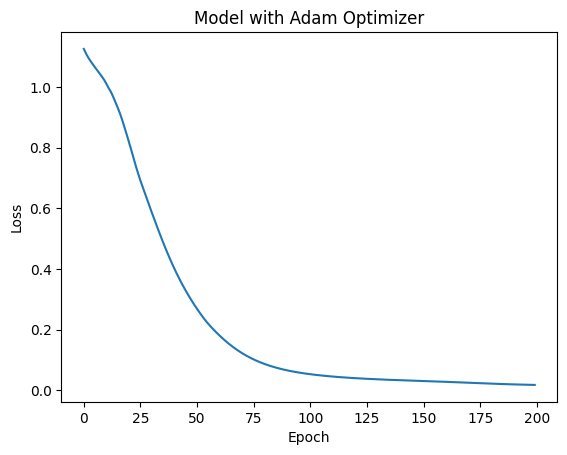

In [25]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model with Adam Optimizer')

In [26]:
final_loss = loss.detach().numpy()
print(f"Final Loss with Model Type 1: {final_loss:.4f}")

Final Loss with Model Type 1: 0.0176


Expermenting with different optimizer

In [27]:
optimizer2 = torch.optim.SGD(model.parameters(), lr = 0.01)

In [28]:
epochs =200
losses2 = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = loss_type(y_pred, y_train)

  losses2.append(loss.detach().numpy()) # Corrected: appending to losses2

  if i%10==0:
    print(f"Epoch: {i} and Loss: {loss}")

  #backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer2.step()

Epoch: 0 and Loss: 0.0174928717315197
Epoch: 10 and Loss: 0.0173675287514925
Epoch: 20 and Loss: 0.01735609583556652
Epoch: 30 and Loss: 0.017344683408737183
Epoch: 40 and Loss: 0.01733332686126232
Epoch: 50 and Loss: 0.017322001978754997
Epoch: 60 and Loss: 0.017310669645667076
Epoch: 70 and Loss: 0.017299408093094826
Epoch: 80 and Loss: 0.01728818006813526
Epoch: 90 and Loss: 0.017276983708143234
Epoch: 100 and Loss: 0.017265815287828445
Epoch: 110 and Loss: 0.017254672944545746
Epoch: 120 and Loss: 0.01724359579384327
Epoch: 130 and Loss: 0.017232505604624748
Epoch: 140 and Loss: 0.017221461981534958
Epoch: 150 and Loss: 0.01721043512225151
Epoch: 160 and Loss: 0.017199451103806496
Epoch: 170 and Loss: 0.017188536003232002
Epoch: 180 and Loss: 0.01717761904001236
Epoch: 190 and Loss: 0.017166700214147568


Text(0.5, 1.0, 'Loss Graph for model with SGD Optimizer')

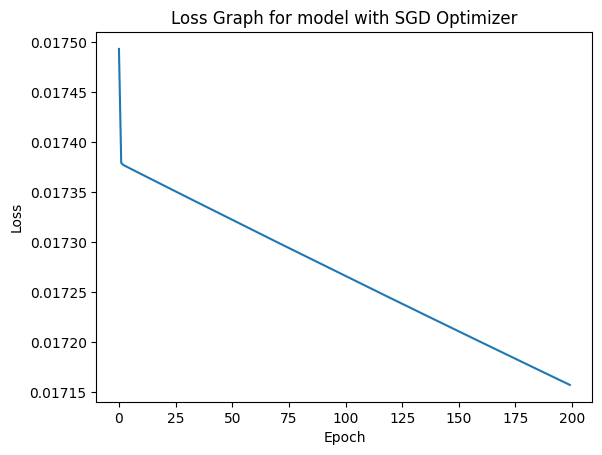

In [29]:
plt.plot(range(epochs), losses2)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Graph for model with SGD Optimizer')

In [30]:
epochs =300
losses2 = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = loss_type(y_pred, y_train)

  losses2.append(loss.detach().numpy()) # Corrected: appending to losses2

  if i%10==0:
    print(f"Epoch: {i} and Loss: {loss}")

  #backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer2.step()

Epoch: 0 and Loss: 0.017155846580863
Epoch: 10 and Loss: 0.01714501529932022
Epoch: 20 and Loss: 0.017134197056293488
Epoch: 30 and Loss: 0.01712341047823429
Epoch: 40 and Loss: 0.01711266115307808
Epoch: 50 and Loss: 0.017101913690567017
Epoch: 60 and Loss: 0.017091237008571625
Epoch: 70 and Loss: 0.017080552875995636
Epoch: 80 and Loss: 0.017069928348064423
Epoch: 90 and Loss: 0.017059285193681717
Epoch: 100 and Loss: 0.017048710957169533
Epoch: 110 and Loss: 0.017038127407431602
Epoch: 120 and Loss: 0.017027607187628746
Epoch: 130 and Loss: 0.017017066478729248
Epoch: 140 and Loss: 0.017006555572152138
Epoch: 150 and Loss: 0.016996074467897415
Epoch: 160 and Loss: 0.016985630616545677
Epoch: 170 and Loss: 0.016975222155451775
Epoch: 180 and Loss: 0.01696479134261608
Epoch: 190 and Loss: 0.016954397782683372
Epoch: 200 and Loss: 0.016944073140621185
Epoch: 210 and Loss: 0.016933714970946312
Epoch: 220 and Loss: 0.016923418268561363
Epoch: 230 and Loss: 0.016913123428821564
Epoch: 240

Text(0.5, 1.0, 'Loss Graph for model with SGD Optimizer w 300 epochs')

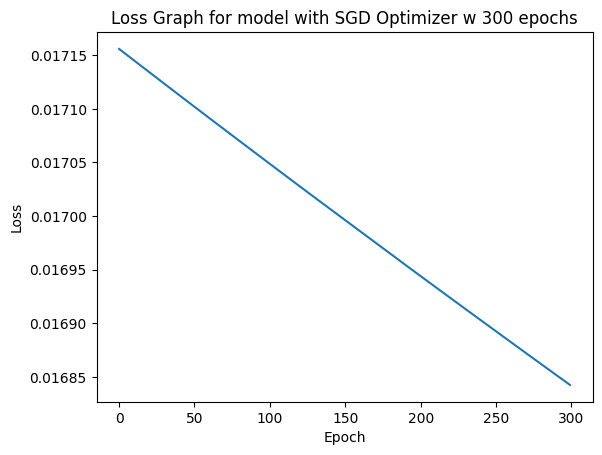

In [31]:
plt.plot(range(epochs), losses2)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Graph for model with SGD Optimizer w 300 epochs')

### Explanation for almost linear, zig-zag fashion loss decrease

- SGD uses a single global learning rate for all parameters, so updates can be noisy and inefficient when gradients have different scales across weights.
- This leads to slower, more oscillatory (nearly linear) loss reduction compared to Adam.


### Trying SGD with momentum

Momentum is basically an optimization technique that considers a running average of past gradients (accumulates in a sense) during updates, so that the optimizer movement is smoother and is more consistent with better convergence

Adam uses momentum in its equation to update weights


In [32]:
optimizer_momentum = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [35]:
epochs_momentum = 300
losses_momentum = []

for i in range(epochs_momentum):
  # Forward pass
  y_pred_momentum = model.forward(X_train)
  loss_momentum = loss_type(y_pred_momentum, y_train)

  losses_momentum.append(loss_momentum.detach().numpy())

  # Print every 10 epochs
  if i%10==0:
    print(f"Epoch: {i} and Loss: {loss_momentum:.4f}")

  # Backpropagation
  optimizer_momentum.zero_grad()
  loss_momentum.backward()
  optimizer_momentum.step()

Epoch: 0 and Loss: 0.0151
Epoch: 10 and Loss: 0.0151
Epoch: 20 and Loss: 0.0150
Epoch: 30 and Loss: 0.0149
Epoch: 40 and Loss: 0.0148
Epoch: 50 and Loss: 0.0148
Epoch: 60 and Loss: 0.0147
Epoch: 70 and Loss: 0.0146
Epoch: 80 and Loss: 0.0145
Epoch: 90 and Loss: 0.0145
Epoch: 100 and Loss: 0.0144
Epoch: 110 and Loss: 0.0143
Epoch: 120 and Loss: 0.0142
Epoch: 130 and Loss: 0.0142
Epoch: 140 and Loss: 0.0141
Epoch: 150 and Loss: 0.0140
Epoch: 160 and Loss: 0.0140
Epoch: 170 and Loss: 0.0139
Epoch: 180 and Loss: 0.0138
Epoch: 190 and Loss: 0.0138
Epoch: 200 and Loss: 0.0137
Epoch: 210 and Loss: 0.0136
Epoch: 220 and Loss: 0.0136
Epoch: 230 and Loss: 0.0135
Epoch: 240 and Loss: 0.0134
Epoch: 250 and Loss: 0.0134
Epoch: 260 and Loss: 0.0133
Epoch: 270 and Loss: 0.0132
Epoch: 280 and Loss: 0.0132
Epoch: 290 and Loss: 0.0131


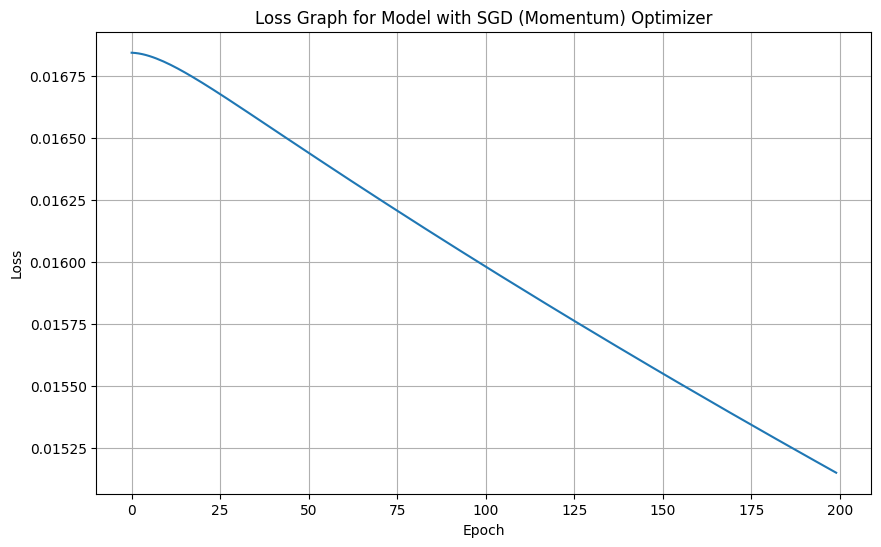

Final Loss with SGD (Momentum) Optimizer: 0.0152


In [34]:
import matplotlib.pyplot as plt

# Visualization for SGD with Momentum
plt.figure(figsize=(10, 6))
plt.plot(range(epochs_momentum), losses_momentum)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Graph for Model with SGD (Momentum) Optimizer')
plt.grid(True)
plt.show()

final_loss_momentum = losses_momentum[-1]
print(f"Final Loss with SGD (Momentum) Optimizer: {final_loss_momentum:.4f}")